# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [2]:
#shape of ds
total_data.shape

(48895, 16)

In [3]:
# Obtain information about data types and non-null values
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
total_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
total_data.iloc[2]

id                                                               3647
name                              THE VILLAGE OF HARLEM....NEW YORK !
host_id                                                          4632
host_name                                                   Elisabeth
neighbourhood_group                                         Manhattan
neighbourhood                                                  Harlem
latitude                                                     40.80902
longitude                                                    -73.9419
room_type                                                Private room
price                                                             150
minimum_nights                                                      3
number_of_reviews                                                   0
last_review                                                       NaN
reviews_per_month                                                 NaN
calculated_host_list

In [6]:
total_data.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Duplicate Investigation

In [7]:
#Check for duplicates
total_data.duplicated().sum()

0

In [8]:
total_data.drop(["id"], axis = 1).duplicated().sum()

0

In [9]:
total_data['host_name'].duplicated().sum()

37442

In [10]:
#total_data[total_data['host_name'].duplicated()]

In [11]:
columns_to_check = ['latitude', 'longitude']  # Example: Columns A and C
# Check for duplicates in the specified columns
duplicates = total_data.duplicated(subset=columns_to_check).sum() #keep= False).sum()
print(duplicates)


24


In [12]:

#total_data[duplicates].sort_values(by = 'latitude')


#### Dropping unnecessary Parameters

In [13]:
total_data.columns = total_data.columns.str.strip()

total_data.drop(columns=["name", "host_name", "last_review", "reviews_per_month"], inplace=True)

print(total_data.head())

     id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2 

##### Checking multiple variables, including the latitude + longitude (to figure out whether a listing is in the exact same place as the other), & the host name, we can disregard the existence of any duplicates fully as:
lat + long investigation: although the lat + long were a total match, the listing name, host and price was in all instances different, or given context were clerly on different floors of a building

host name investigation : there are landlords with more than one listing which makes sense given the addresses in the listings are different, no duplicates found here

### Analysis of Univariate Variables

#### Categorical

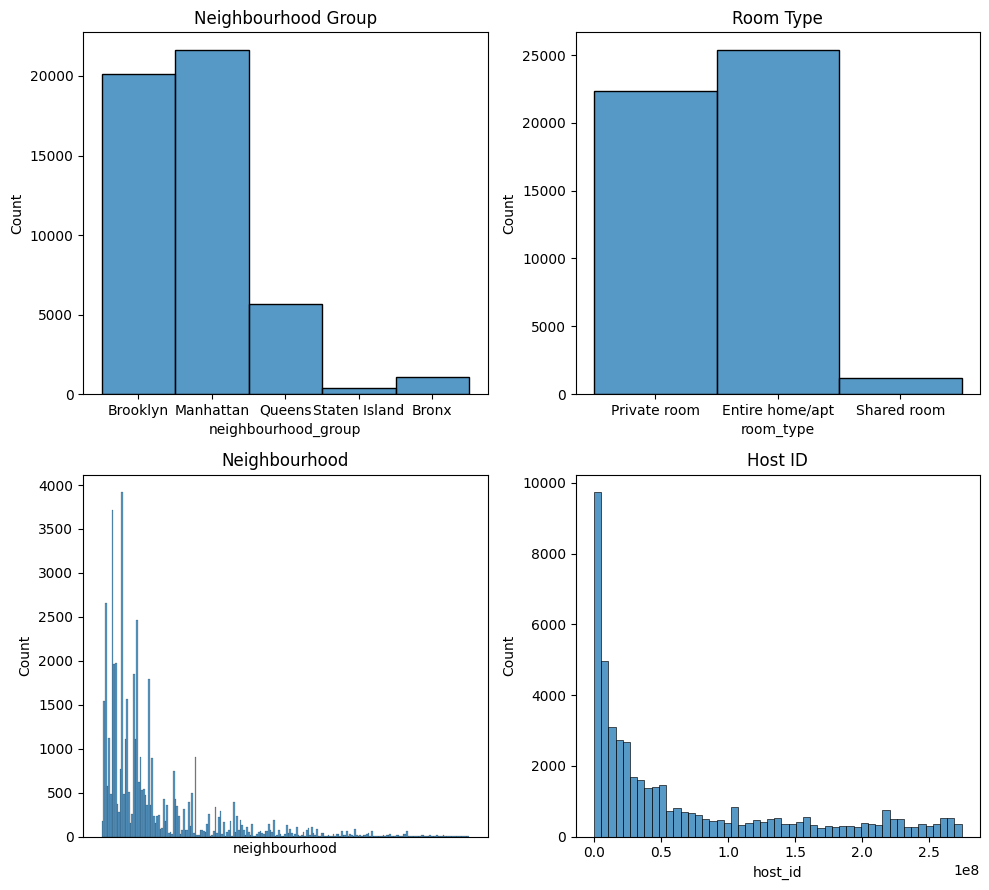

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



# Plot categorical variables
fig, axis = plt.subplots(2, 2, figsize=(10, 9))

sns.histplot(ax=axis[0,0], data=total_data, x="neighbourhood_group")
axis[0, 0].set_title("Neighbourhood Group")

sns.histplot(ax=axis[0,1], data=total_data, x="room_type")
axis[0, 1].set_title("Room Type")

sns.histplot(ax=axis[1,0], data=total_data, x="neighbourhood").set_xticks([])
axis[1, 0].set_title("Neighbourhood")

sns.histplot(ax = axis[1,1], data = total_data, x = "host_id")
axis[1, 1].set_title("Host ID")
plt.tight_layout()
plt.show()



#### Analysis
1. Neighbourhood Group + Neighbourhood : Brooklyn and Manhattan seem to have the most listings which makes sense given the supply demand question and significance of these neighbourhoods.

2. Room Type : Not that many shared rooms available, this again can be attribuited to supply demand

3. Host ID : W/o the NaNs, which again could be a replacement, there are many hosts with multiple listings

#### Numeric

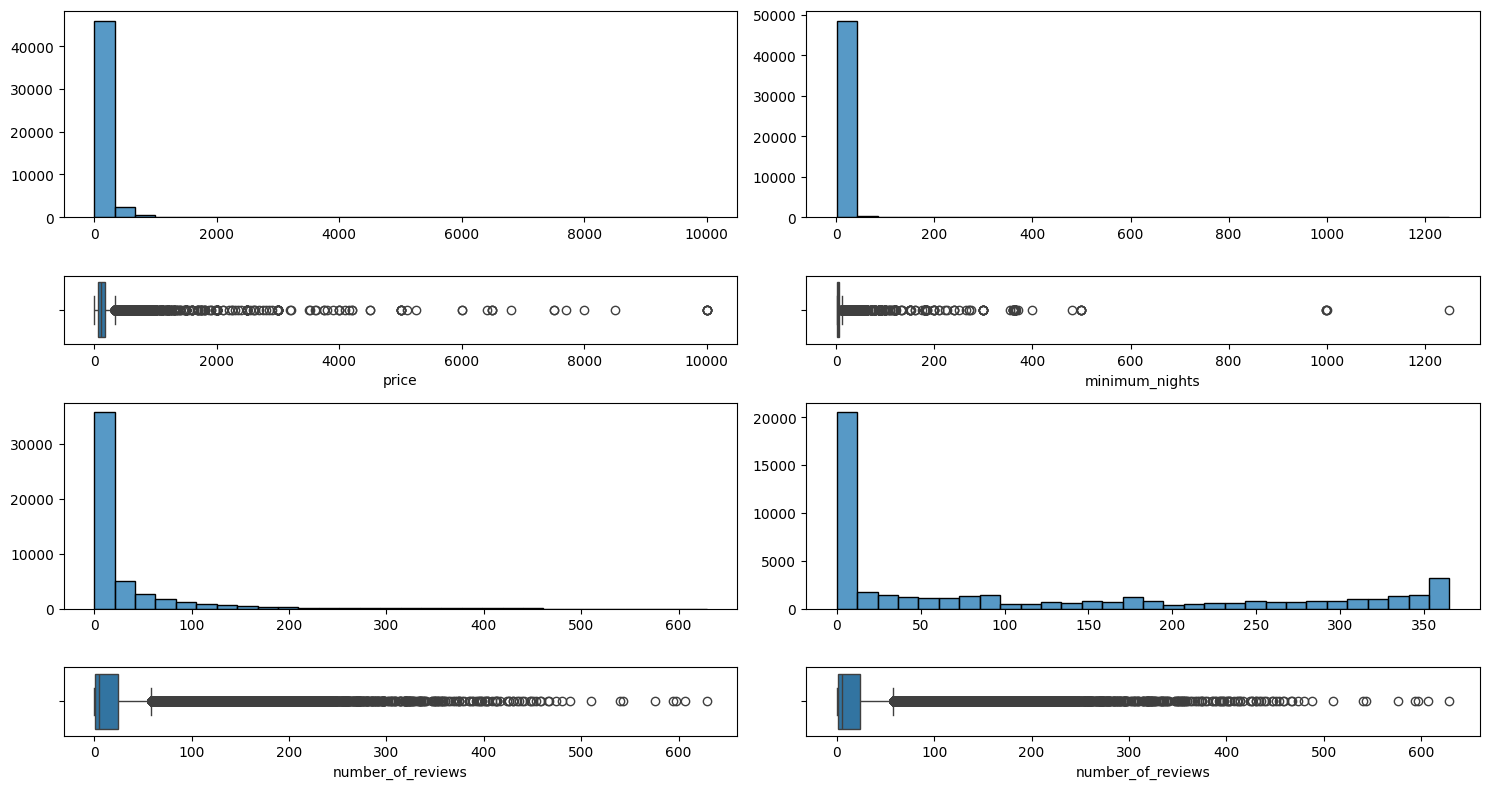

In [15]:

# Plot numeric variables
fig, axis = plt.subplots(4, 2, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 1, 3, 1]})

sns.histplot(ax=axis[0, 0], data=total_data, x="price", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="price")

sns.histplot(ax=axis[0, 1], data=total_data, x="minimum_nights", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="minimum_nights")

sns.histplot(ax=axis[2, 0], data=total_data, x="number_of_reviews", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=total_data, x="number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "availability_365",  bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3,1], data=total_data, x="number_of_reviews")

plt.tight_layout()
plt.show()


#### Analysis:

1. All distributions appear to be right-skewed.

2. Price:  We will assume that all '0' entries are replacements for NaNs, but regardess, the distribution would likely remain right-skewed, with most listings having lower prices and a few outliers with higher prices. This could perhaps be a log normal distribution, we will check.

3. Minimum Nights: A majority of listings have a shorter minimum stay requirement, with a smaller proportion having longer requirements.

4. Number of Reviews: Listings are mostly consistent in review #s

5. Availability : The bulk of the rooms avaialble all year


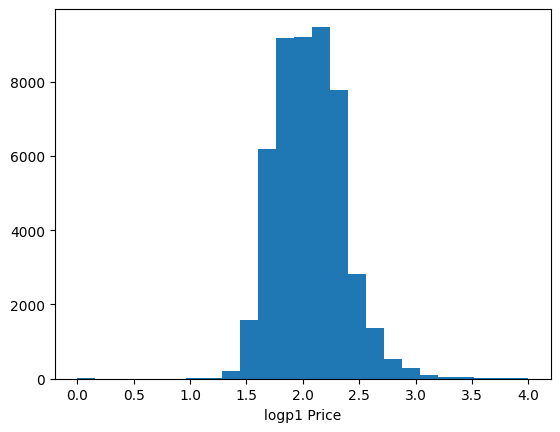

In [16]:
import numpy as np
plt.hist(np.log10(total_data['price']+1), bins=25)
plt.xlabel('logp1 Price')
plt.show()

### Multivariate Variables

#### Numerical-numerical

We will compare all against price as it is our target variable

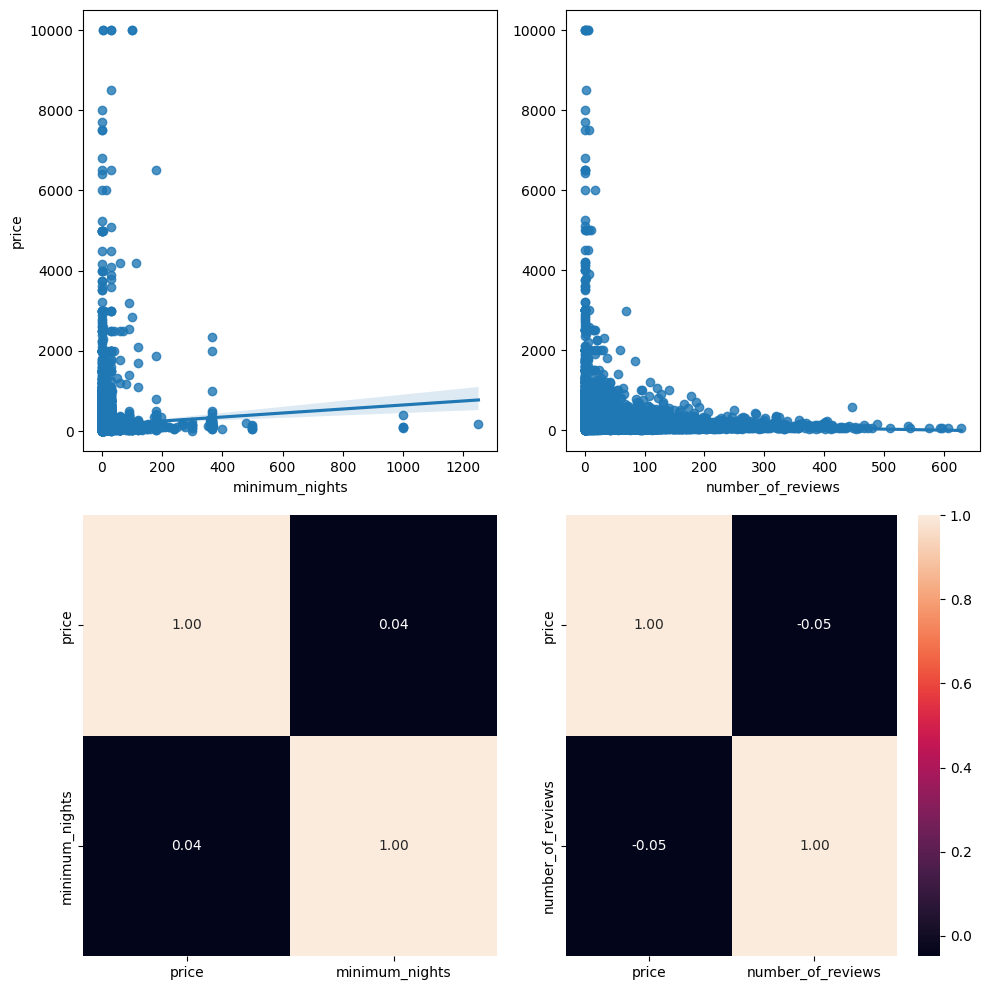

In [17]:

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


plt.tight_layout()
plt.show()

There are no discernible correlations here.

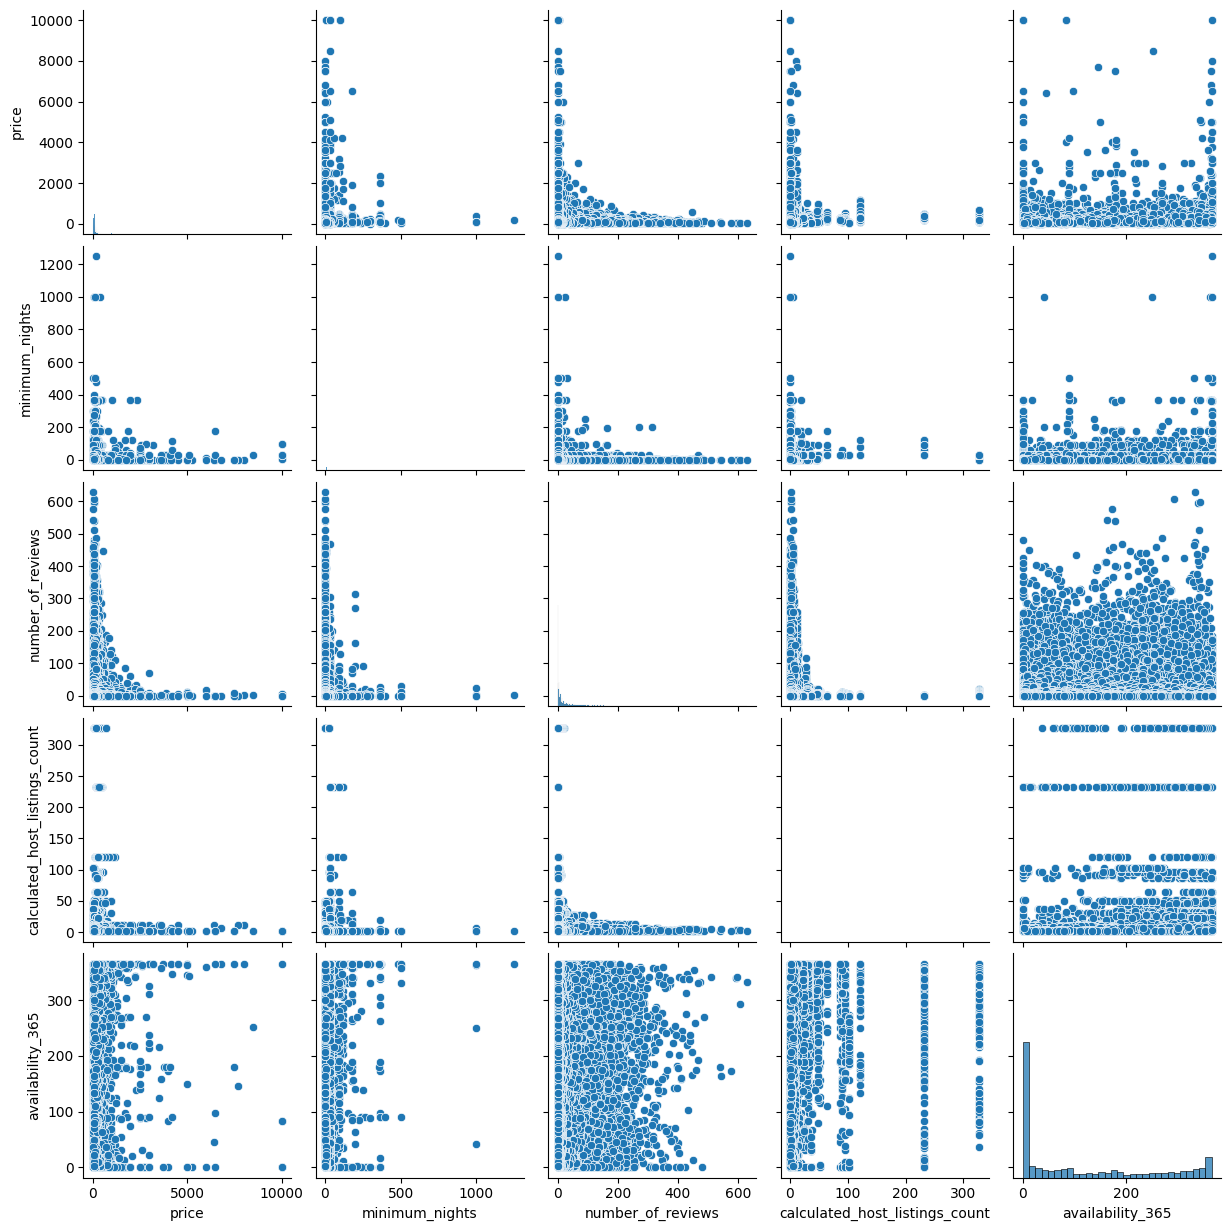

In [18]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
sns.pairplot(data = total_data[numerical_features])

<Axes: >

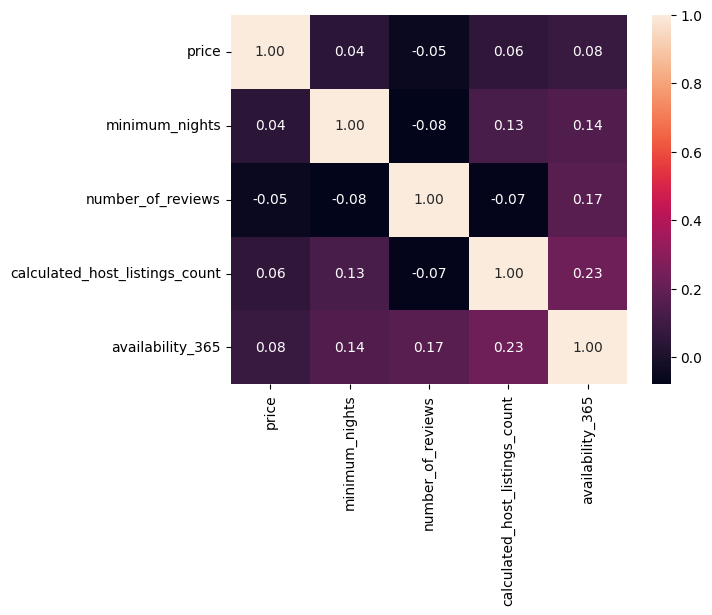

In [19]:
sns.heatmap(total_data[numerical_features].corr(), annot = True, fmt = ".2f")

Analysis:  There is a .23 positive correlation between Host listing count and the Availablity of the rooms which could suggest that as the number of listings a host has increases, the availability of those listings also tends to increase. This could indicate that hosts with more listings tend to keep their properties more consistently available for booking throughout the year.

#### Categorical - Categorical

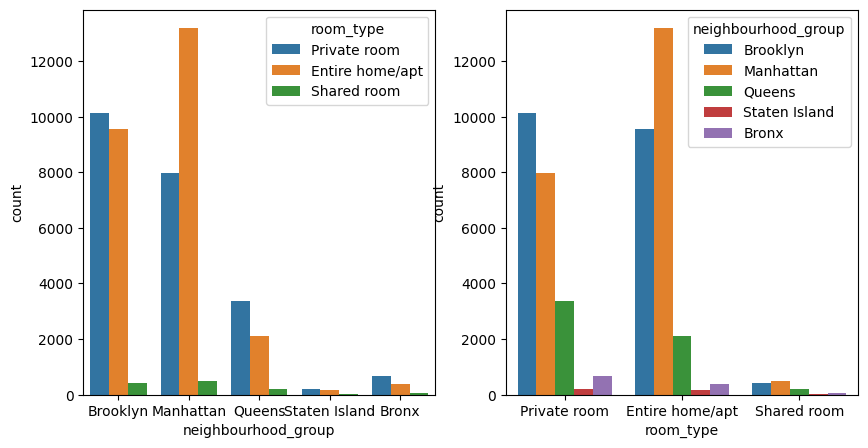

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(ax=axis[0], data=total_data, x="neighbourhood_group", hue="room_type")
sns.countplot(ax=axis[1], data=total_data, x="room_type", hue="neighbourhood_group")

plt.show()


#### Analysis:
1. Manhattan + Brooklyn : have the highest number of listings, primarily comprising Entire home/apt and Private rooms. Brooklyn has more private rooms which, when considering its socio economic demograhpic, for space optimization makes sense.

2. Other neighborhood groups such as Queens, Bronx, and Staten Island have fewer listings overall, with a higher proportion of Entire home/apt listings compared to Private rooms or Shared rooms. Again, this is geographically congruent.

3. Highest frequency of listings is for Private rooms.

In [21]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]

total_data[['room_type', 'room_type_n']]

room_type  room_type_n
0         Private room            0
1      Entire home/apt            1
2         Private room            0
3      Entire home/apt            1
4      Entire home/apt            1
...                ...          ...
48890     Private room            0
48891     Private room            0
48892  Entire home/apt            1
48893      Shared room            2
48894     Private room            0

[48895 rows x 2 columns]

In [22]:
categorical_data = ['room_type_n', 'neighbourhood_group_n', 'neighbourhood_n']

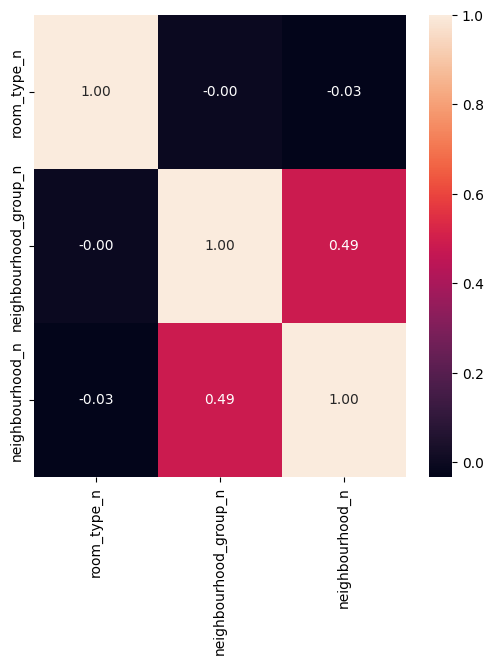

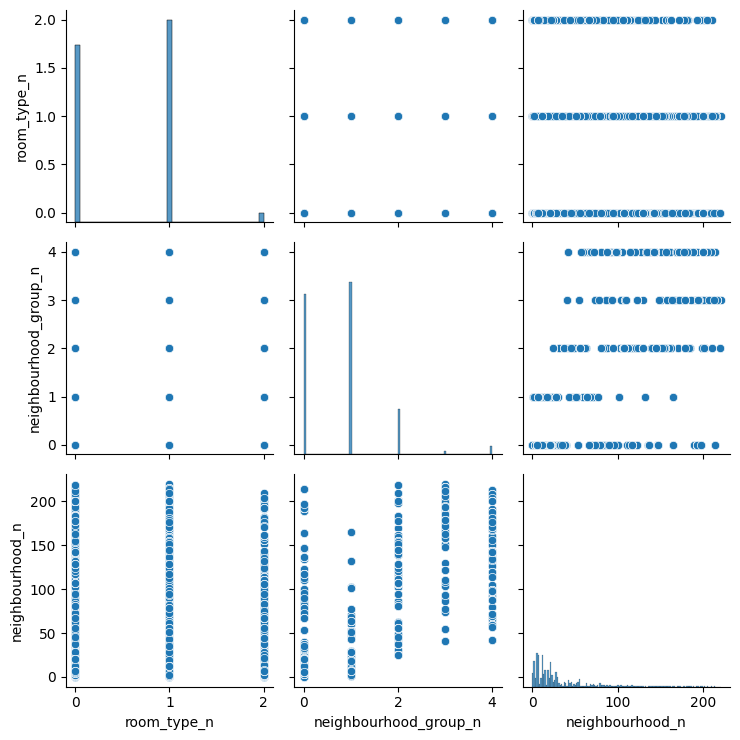

In [23]:

fig, axes = plt.subplots(figsize=(6, 6))

sns.heatmap(total_data[categorical_data].corr(), annot = True, fmt = ".2f")
sns.pairplot(data = total_data[categorical_data])
plt.tight_layout()

# Draw Plot
plt.show()

The only correlation is between neighbourhood and neighbourhood group which makes sense as one is a subset of the other 

### Numerical-categorical 

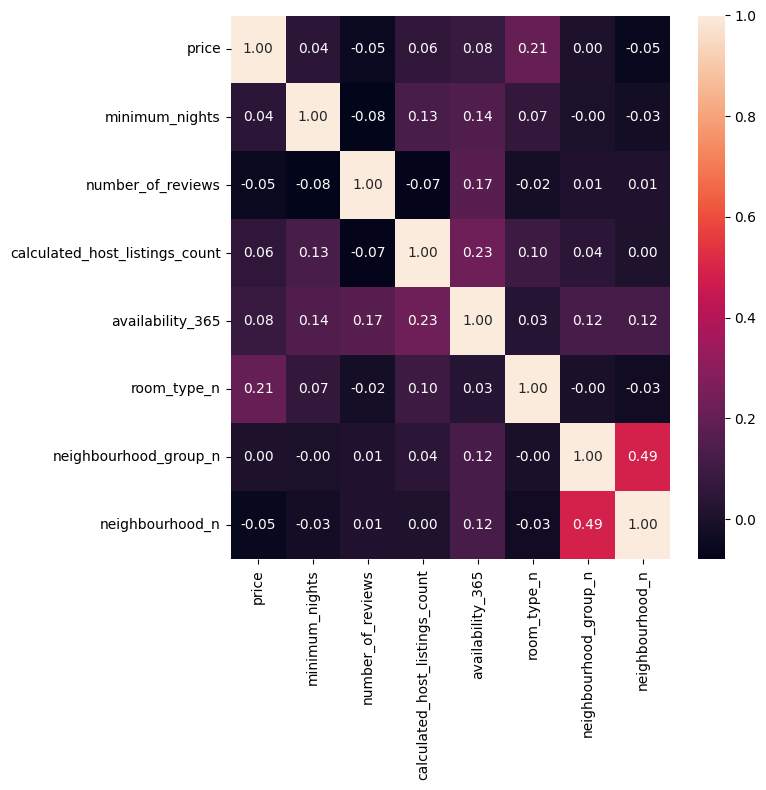

In [24]:

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[numerical_features + categorical_data].corr(), annot = True, fmt = ".2f")
plt.tight_layout()

No strong correlation.

<Axes: xlabel='room_type', ylabel='price'>

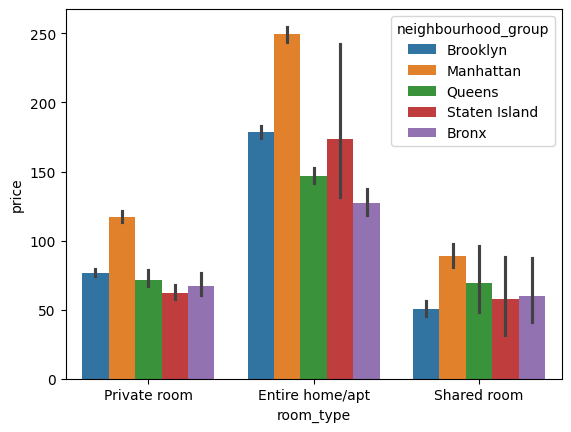

In [25]:
sns.barplot(data = total_data, x = "room_type", y = "price", hue = "neighbourhood_group")

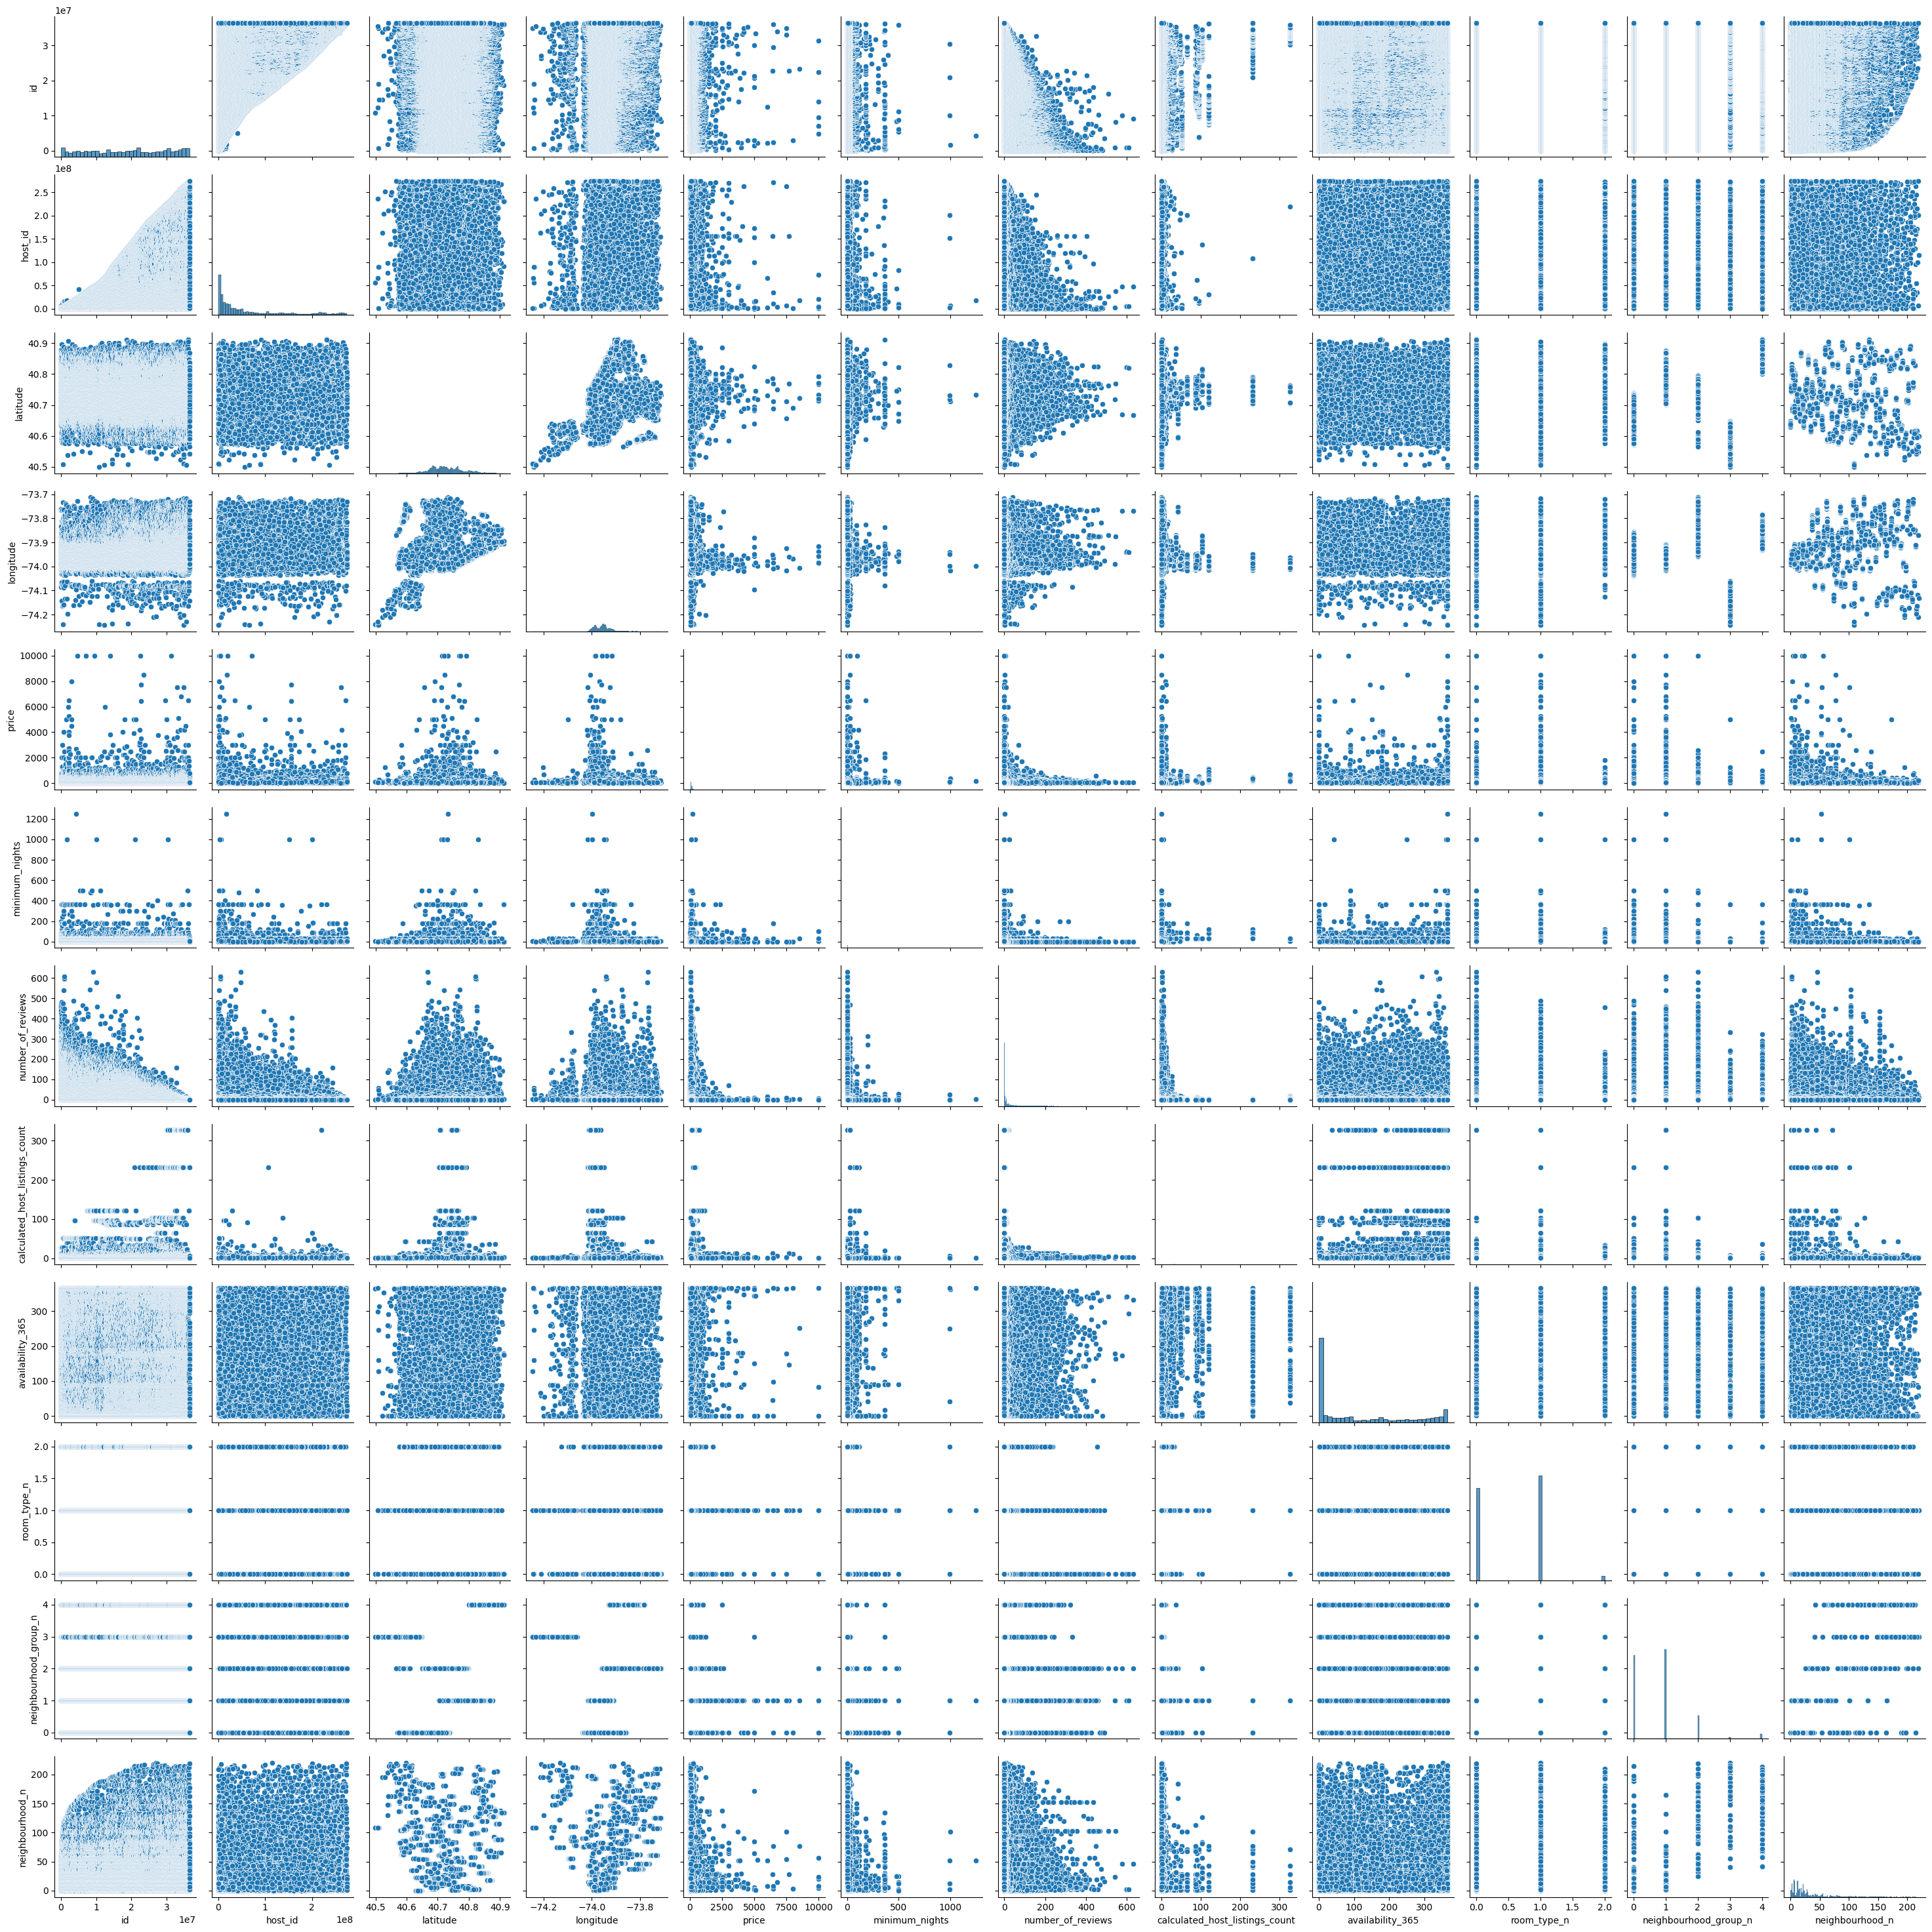

In [26]:
sns.pairplot(data = total_data)

# Feature Engineering

In [27]:
total_data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    48895.000000       48895.000000                    48895.000000   
mean         7.029962          23.274466                        7.143982   
std         20.510550          44.550582                       32.952519   
min          1.000000           0.000000                        1.000000   
25%          1.000000           1.000000                        1.000000   
50%          3.000000           5.000000                        1.000000   
75%          5.000000          24.000000                        2.000000   
max       1250.000000         629.000000                      327.000000   

       availability_365   room_type_n  neighbourhood_group_n  neighbourhood_n  
count      48895.000000  48895.000000           48895.000000     48895.000000  
mean         112.781327      0.567113               0.786911        29.888782  
std          131.622289      0.541249               0.844386        34.676634  
min            0.000000      0.000000               0.000000         0.000000  
25%            0.000000      0.000000               0.000000         7.500000  
50%           45.000000      1.000000               1.000000        19.000000  
75%          227.000000      1.000000               1.000000        37.000000  
max          365.000000      2.000000               4.000000       220.000000

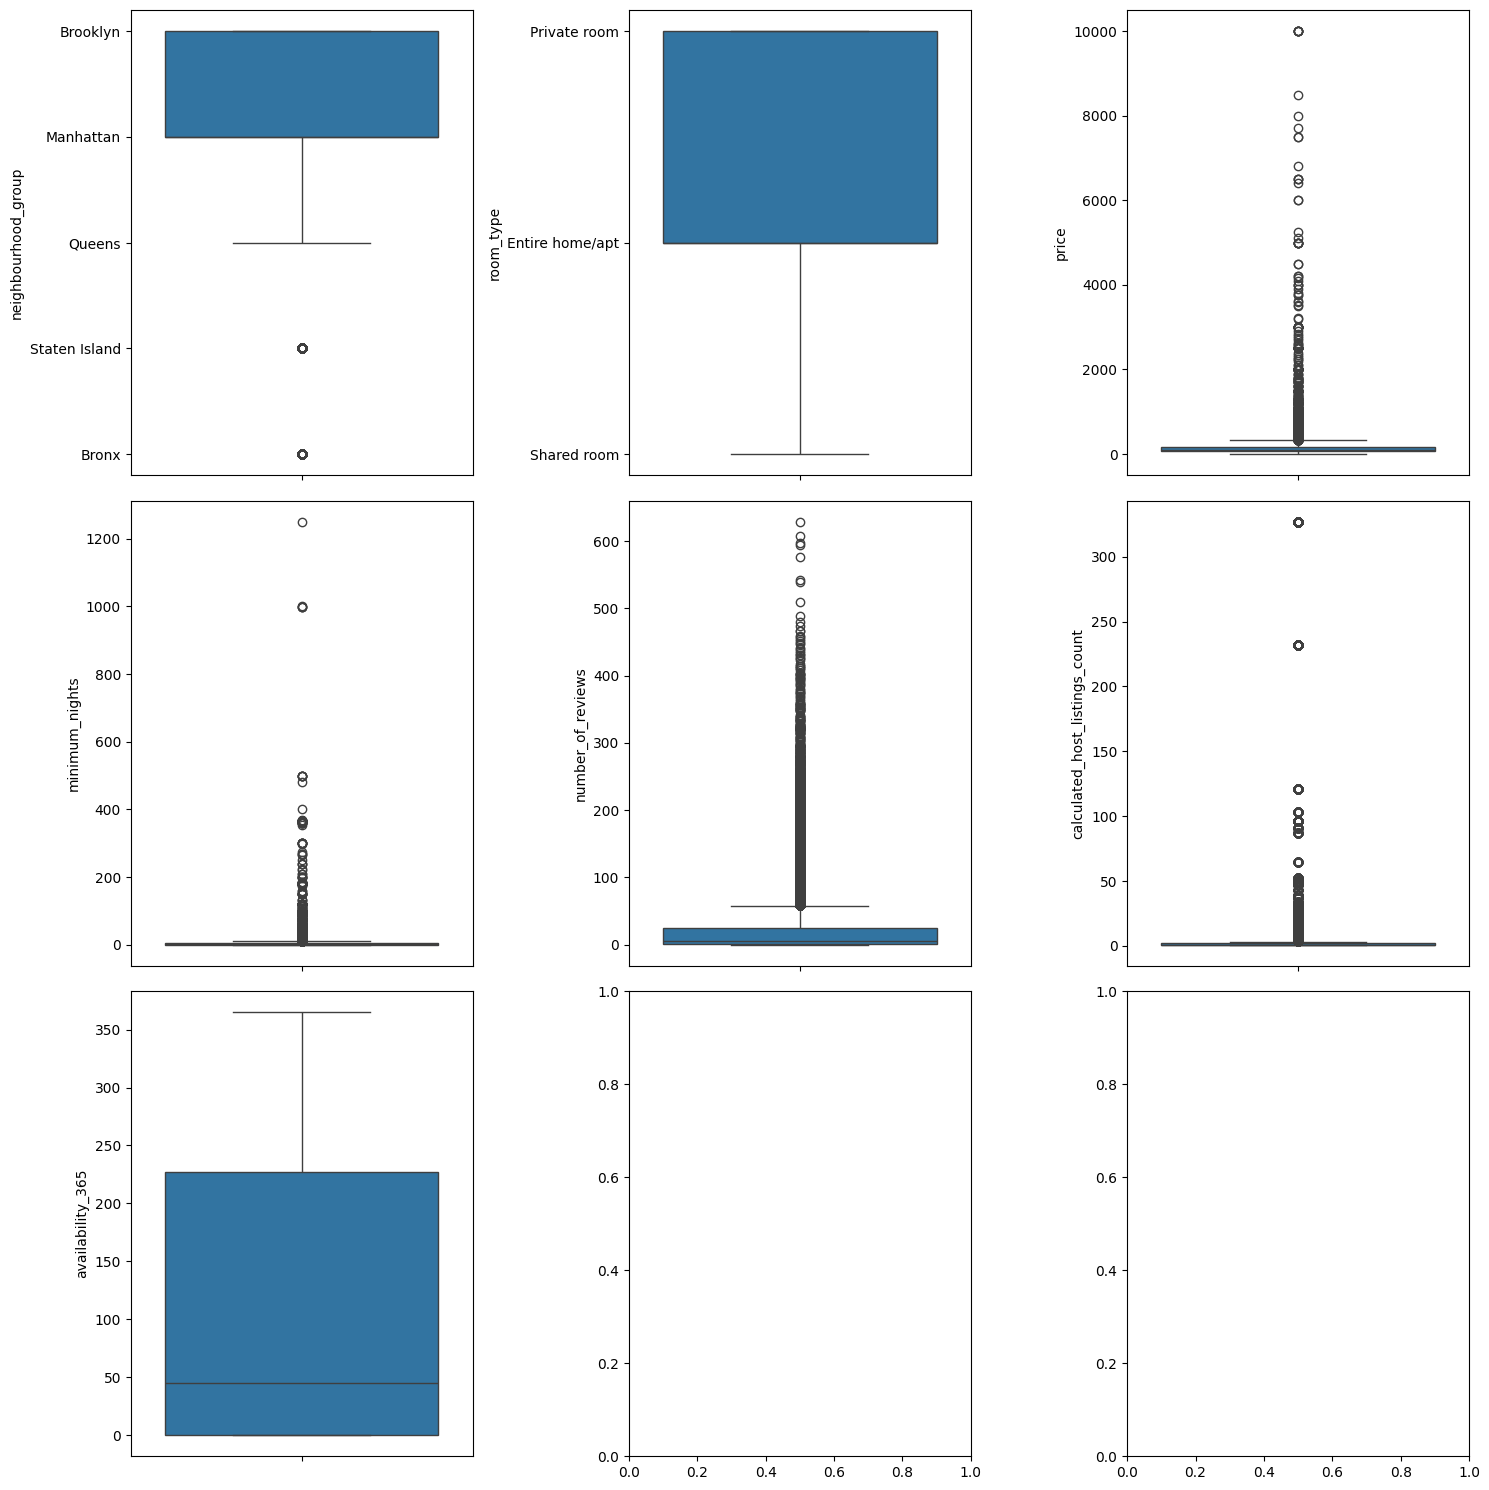

In [28]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "room_type")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "price")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "availability_365")


plt.tight_layout()

plt.show()

We can clearly see that there are outstanding outliers in the Price, Min Nights, Number of Reviews, and Host Listings Count, we will further investigate.

#### Price Outliers

In [29]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Too many listings in the upper outlier range and most seem to be concentrated in Manhattan, obviously luxary listings, however, as we mentioned previously the "$0" listings must be an error so we will IMPUTE AFTER SPLIT

In [46]:
#total_data = total_data[total_data["price"] > 0]

#### Minimum Night Outliers

In [33]:
min_night_stats = total_data["minimum_nights"].describe()
min_night_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [35]:
total_data['minimum_nights'].value_counts()

minimum_nights
1      12717
2      11693
3       7998
30      3758
4       3302
       ...  
186        1
366        1
68         1
87         1
36         1
Name: count, Length: 109, dtype: int64

For the purpouse of training our model, it is unreasonable to assume any listing with a required minimum stay of over 20 days is redundant, as most listings are packed before that threshold, therefore, we IMPUTE AFTER SPLIT and stay within ~1**** standard deviation

In [36]:
total_data = total_data[total_data["minimum_nights"] <= 20]

#### No. Reviews Outliers

In [53]:
reviews_stats = total_data["number_of_reviews"].describe()
reviews_stats

count    43556.000000
mean        25.098953
std         46.180291
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

OUTLIERS IMPUTE AFTER SPLIT

#### Host Listings Count Outliers

An outlier in this again wouldnt be cause for deletion. It is common that realestate groups would post their listings on such a site, it doesnt have to be an error at all.

### Split Data

In [62]:
X = total_data[['number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_n', 'room_type_n']] 
y = total_data['price'] 

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
y_train.mean(), y_test.mean()

(148.80269199862244, 147.64359504132233)

### Imputing

In [65]:
# PRICE

# Step 1: Calculate the mean value of the 'price' column using non-zero values from y_train
mean_price_train = np.mean(y_train[y_train != 0])

# Step 2: Replace '0' values with the mean value in both y_train and y_test
y_train[y_train == 0] = mean_price_train
y_test[y_test == 0] = mean_price_train


In [66]:
#REVIEWS

mean_reviews_train = X_train['number_of_reviews'].mean()

# Step 2: Replace values above 20 with the mean value in both the training and test sets
X_train.loc[X_train['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train
X_test.loc[X_test['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train

# print(X_train['number_of_reviews'].describe())

/tmp/ipykernel_9138/2711943112.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.942859602801057' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train
/tmp/ipykernel_9138/2711943112.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.942859602801057' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train


In [67]:
# MIN NIGHTS

mean_minimum_nights_train = X_train['minimum_nights'].mean()

# Step 2: Replace values above 20 with the mean value in both the training and test sets
X_train.loc[X_train['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train
X_test.loc[X_test['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train

# print(X_train['minimum_nights'].describe())

/tmp/ipykernel_9138/3367104811.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.0851796579038' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train
/tmp/ipykernel_9138/3367104811.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.0851796579038' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train


### Scaling + Feature Engineering

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.feature_selection import f_classif, SelectKBest


selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

In [70]:
X_train_sel

number_of_reviews  calculated_host_listings_count  availability_365  \
0              -0.541573                       -0.108638         -0.791593   
1               0.044171                       -0.108638          1.281403   
2              -0.932069                       -0.108638         -0.552401   
3              -1.029693                       -0.108638         -0.321182   
4               0.141795                       -0.015959          2.118575   
...                  ...                             ...               ...   
34839          -1.029693                       -0.062299         -0.105910   
34840           1.405330                       -0.108638         -0.791593   
34841          -0.932069                       -0.108638         -0.791593   
34842           1.405330                       -0.108638          0.412339   
34843          -0.736821                       -0.062299         -0.791593   

       neighbourhood_group_n  room_type_n  
0                   0.255768     0.832391  
1                   0.255768     0.832391  
2                   0.255768     2.671217  
3                  -0.907372     0.832391  
4                   1.418907    -1.006436  
...                      ...          ...  
34839              -0.907372    -1.006436  
34840               0.255768     0.832391  
34841               0.255768    -1.006436  
34842               0.255768     0.832391  
34843               0.255768    -1.006436  

[34844 rows x 5 columns]

In [71]:
dict(zip(X_train.columns,selection_model.scores_))

{'number_of_reviews': 2.7078933975655612,
 'minimum_nights': 1.0661374719873944,
 'calculated_host_listings_count': 38.09842752512066,
 'availability_365': 2.9943431920624954,
 'neighbourhood_group_n': 1.1855280264829444,
 'room_type_n': 29.919342767194898}

In [72]:
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)

In [74]:
X_train_sel.to_csv('/workspaces/machine-learning-python-template/data/processed/clean_train.csv')
X_test_sel.to_csv('/workspaces/machine-learning-python-template/data/processed/clean_test.csv')
